# Исследование игровых платформ и жанров

Целью проекта является определение успешности игры и игровых платформ, выявление закономерностей. Данные полученные в результате выполнения проекта позволят спланировать рекламные кампании.
В проекте используется датесет с данными до 2016 года.
Описание столбцов:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB

### Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd #импортируем библиотеку pandas
import matplotlib.pyplot as plt #импортируем библиотеку matplotlib для визуализации гистограмм и графиков
from scipy import stats as st #импортируем библиотеку stats для проверки гипотез
import numpy as np #импортируем библиотеку numpy для работы с числовыми массивами

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
#откроем датасет с помощью pandas, для этого загрузим его в переменную data:
data = pd.read_csv('/datasets/games.csv')

In [4]:
data.info() #получим общую информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


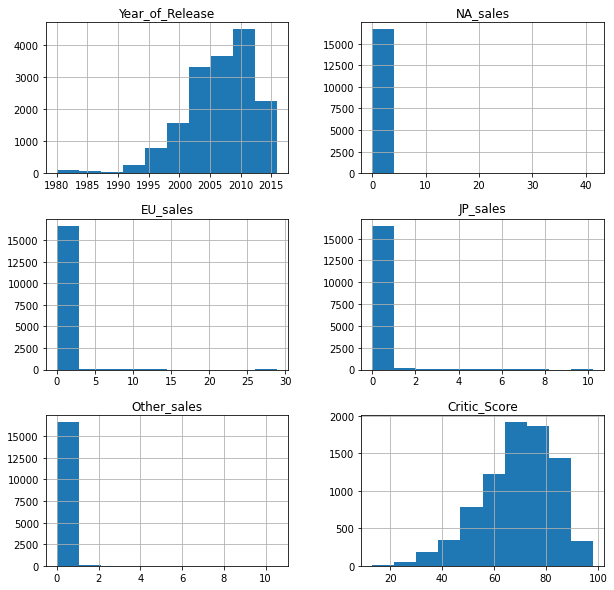

In [5]:
data.hist(figsize=(10,10)) #построим гистограммы для data размером 10 на 10 дюймов
plt.show()

Из гистограмм можно увидеть следующее:
- количество данных за период до 1990 года значительно меньше, чем за период 1990-2016
- Гистограма по столбцу Critic_Score имеет вид скошенного биномиального распределения

Далее необходимо проверить насколько верными являются данные наблюдения

In [6]:
display(data.head()) #выведем на экран первые 5 строк data:

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Предобработка данных

#### Приведём данные к нижнему регистру

In [7]:
#Заменим названия столбцов (приведём к нижнему регистру)
data.columns = data.columns.str.lower() 

Приведём значения в столбцах: 'name', 'platform', 'genre' к нижнему регистру 

In [8]:
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()

#### Работа с пропусками в данных

In [9]:
#Определим количество пропусков в данных
print(data.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [10]:
#Определим процент пропусков в каждом столбце
print(round((data.isna().sum() / len(data) * 100),2))

name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         40.09
rating             40.48
dtype: float64


Посмотрим на строки содержащие пропуски в столбца 'year_of_release', 'name', 'genre', если продажи по ним не велики, то удалим эти строки
        
        

In [11]:
display(data[data['year_of_release'].isna() | data['name'].isna() | data['genre'].isna()]\
        .sort_values(by='na_sales', ascending = False).head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
657,frogger's adventures: temple of the frog,gba,NaN,adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
627,rock band,x360,NaN,misc,1.93,0.33,0.00,0.21,92.0,8.2,T
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
678,lego indiana jones: the original adventures,wii,NaN,action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
805,rock band,wii,NaN,misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1506,adventure,2600,NaN,adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN


Продажи не велики, удаляем строки с пропусками в столбцах 'year_of_release', 'name', 'genre'

In [12]:
data = data.dropna(subset=['year_of_release', 'name', 'genre'])

In [13]:
data.reset_index(drop= True , inplace= True)

Пропуски в столбцах 'critic_score', 'user_score', 'rating' могут быть связаны, как с техническими причинами (например, ошибки при выгрузке датасета), так и связаны с отсутствием установленного рейтинга для игр и игровых платформ. Количество пропусков в данных столбцах составляет от 40 до 51 процента и в целях дальнейшего исследования эти данные целесообразно сохранить 

#### Изменение типов данных

In [14]:
#Посмотрим уникальные значения столбца 'user_score'
print(data['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


В столбце 'user_score' имеются данные со значением 'tbd'. У этой аббревиатуры могут быть разные значения, в том числе: To Be Determined - должно быть определено, To Be Decided - должно быть решено, To Be Done - должно быть сделано или To Be Discussed - подлежит обсуждению. В данной интерпритации значения tbd целесообразно заменить на NaN

In [15]:
#преобразуем столбец 'user_score' к формату float, заменив tbd на NaN
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [16]:
#Посмотрим уникальные значения столбца 'year_of_release'
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

Столбец 'year_of_release' можно привести к формату datetime64: data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y'). Либо преобразовать данный столбец к формату int:

In [17]:
#преобразуем столбец 'year_of_release' к формату int
data['year_of_release'] = data['year_of_release'].astype('int')

In [18]:
data.info() #получим общую информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Поиск дубликатов

In [19]:
#проверим наличие явных дубликатов в исправленном датасете
print(data.duplicated().sum())

0


In [20]:
#Посмотрим уникальные значения столбца 'year_of_release'
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В соответствии с данными взятыми с общедоступных интернет ресурсов (https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board) рейтинг игр ESRB основан на их содержании:
- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»
- «RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»

**рейтинг K-A для детей и взрослых: игры. Этот рейтинг использовался до 1998 года , когда он был переименован в E.**

Таким образом, целесообразно привести рейтинг «К-А» к «Е» в датасете

In [21]:
# заменим значения К-А на Е в data
data['rating'] = data['rating'].replace('K-A','E')

#### Найдём суммарные продажи во всех регионах и запишем их в отдельный столбец

In [22]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [23]:
display(data.head()) #выведем на экран первые 5 строк data:

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


#### Работа с пропусками в столбце rating

Алгоритм заполнения пропусков в столбце 'rating':

1) Проанализируем, существуют ли в датафрейме строки с пропущенным значением в 'rating' с таким наименованием игр, для которых в датафрейме существуют другие строки с тем же наименованием игр и для которых рейтинг определён (например игры с тем же наименованием, но выпущенные в разные годы или на разных платформах). Если такие строки существуют, то отсутствующие значения в 'rating' можно подставить из соответствующих строк для игр с одинаковым наименованием.

2) Проанализируем какие уникальные вхождения рейтонгов существуют для игр разных жанров. Если имеются преобладающие рейтинги для какого либо наименования жанра, то исходя из значений в столбце 'genre' установим соответствующее значение в столбце 'rating'.

3) Рейтинг «RP» («Rating Pending») — «Рейтинг ожидается» и оставшиеся пропуски заменим на значение NR (no rating)


In [24]:
data.info() #получим общую информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [25]:
a=list(data[data['rating'].isna()]['name']) #список наименований игр с пропущенным рейтингом
b=list(data[data['rating'].notna()]['name']) #список наименований игр для которых рейтинг указан
c=list(set(a).intersection(set(b))) #пересечение этих списков даст список игр для которых можно сделать подстановку рейтинга

In [26]:
data_isna_rating = data[data['rating'].isna()] #датафрейм содержащий толька строки с пропусками в raiting
data_notna_rating = data[data['rating'].notna()] #датафрейм не содержащий строки с пропусками в raiting

In [27]:
#датафрейм содержащий рейтинг и названия игр общих для датафреймов с пропусками рейтига и без пропусков
data_notna_rating_filter = data_notna_rating.loc[data_notna_rating['name'].isin(c)][['name','rating']]\
.drop_duplicates().reset_index(drop=True)
display(data_notna_rating_filter.head())

,name,rating
0,call of duty: ghosts,M
1,the elder scrolls v: skyrim,M
2,need for speed underground 2,E
3,fifa 14,E
4,donkey kong country returns,E


In [28]:
#Выполним подстановку рейтинга для игр из полученного датафрейма в data
for i in range(len(data['rating'])):
    if data['rating'].isna()[i]:
        for j in range(len(data_notna_rating_filter['name'])):
            if data['name'][i] == data_notna_rating_filter['name'][j]:
                data['rating'][i] = data_notna_rating_filter['rating'][j]

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           10185 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


После подстановки рейтинга из игр с одинаковым наименованием и для которых рейтинг был определён число пропусков в столбце 'rating' уменьшилось на 417 штук 

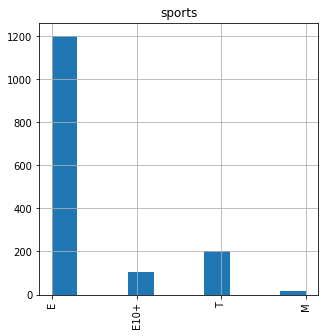

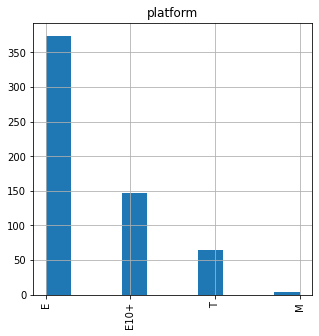

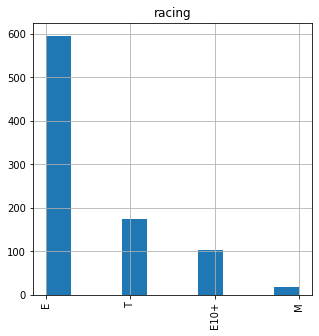

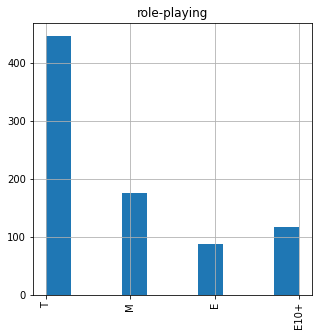

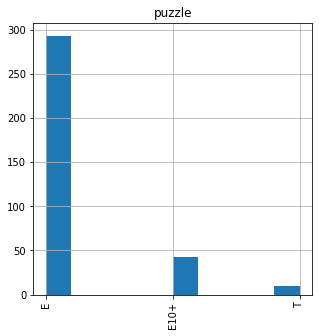

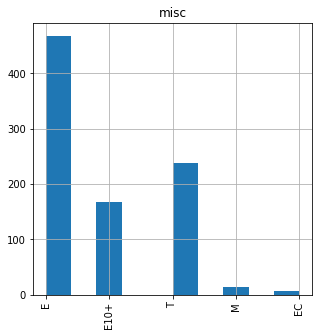

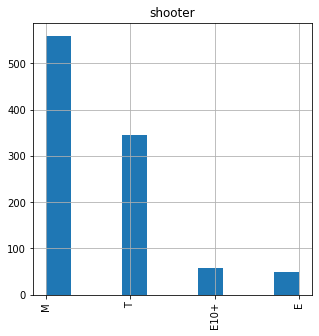

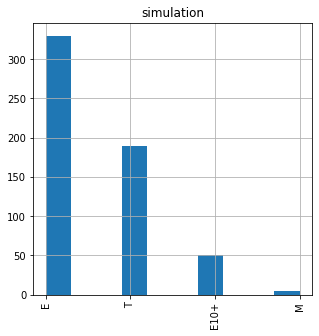

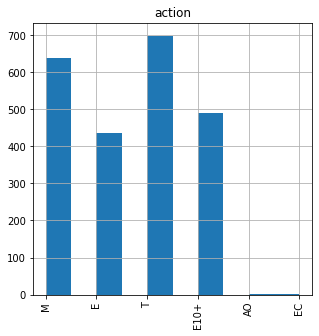

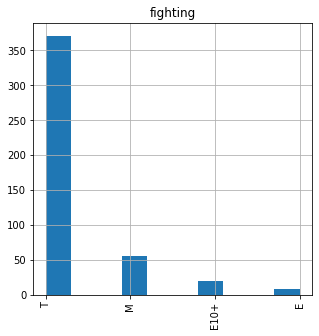

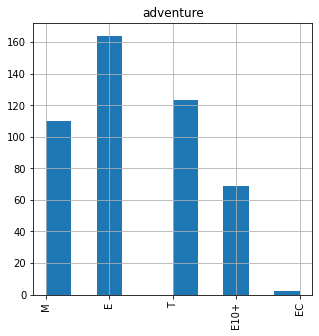

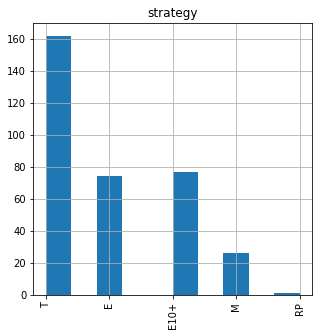

In [30]:
# посмотрим какому рейтингу ESRB чаще всего соответствуют разные жанры игр 
for i in data['genre'].unique():
    data[data['genre'] == i]['rating'].hist(figsize=(5,5))
    plt.title(i)
    plt.xticks(rotation='vertical')
    plt.show()

Из гистограмм видно следующее.

- Игры жанра sports чаще всего имеют рейтинг E
- Игры жанра platform чаще всего имеют рейтинг E
- Игры жанра racing чаще всего имеют рейтинг E
- Игры жанра puzzle чаще всего имеют рейтинг E
- Игры жанра fighting чаще всего имеют рейтинг T

Исходя из этого произведём замену пропущенных значений в столбце rating

Остальные пропуски заполним значением NR (no rating)

In [31]:
for i in range(len(data['rating'])):
    if data['rating'].isna()[i]:
        if data['genre'][i] == ('sports' or 'platform' or 'racing' or 'puzzle'):
            data['rating'][i] == 'E'    
        elif data['genre'][i] == 'fighting':
            data['rating'][i] == 'T'
# заменим пропуски на NR в data



In [32]:
# check
data['rating'].value_counts()

NR      6260
E       4082
T       3025
M       1622
E10+    1444
EC        10
AO         1
Name: rating, dtype: int64

In [33]:
data.info()#Убедимся, что всё сработало как надо

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [34]:
data['rating'].unique() 

array(['E', 'NR', 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

In [35]:
#проверим наличие явных дубликатов в исправленном датасете
print(data.duplicated().sum())

0


#### Вывод по разделу 2

В результате предобработки данных было сделано следующее:
- столбцы приведены к нижнему регистру;
- удалены пропуски в столбцах 'year_of_release', 'name' и 'genre'. Их количество не превышало двух процентов от общих данных.
- пропуски в столбцах 'critic_score', 'user_score', 'rating' могут быть связаны, как с техническими причинами (например, ошибки при выгрузке датасета), так и связаны с отсутствием установленного рейтинга для игр и игровых платформ. 
- были изменены типы данных в столбцах 'user_score' на float и 'year_of_release' на int
- в столбце 'user_score' данные со значением 'tbd' заменены на 'NaN' без изменения смыслового значения. В столбце 'rating' рейтинг «К-А» заменен на «Е» т.к. рейтинг «К-А» был заменён на «Е» в 1998 году
- явные дубликаты в датасете не обнаружены
- датасет был дополнен столбцом 'total_sales', содержащим суммарные данные о продажах во всех регионах
- была произведена обработка данных в столбце rating, включающая в себя присвоение рейтинга для игр с одинаковым названием, присвоение рейтинга на основе распространенности для определенного рейтинга игровых жанров, оставшимся пропуском присвоено значение NR

В результате предобработки количество строк в датасете уменьшилось с 16715 до 16444.  

### Исследовательский анализ данных

#### Определим, сколько игр выпускалось в разные годы и важны ли данные за все периоды

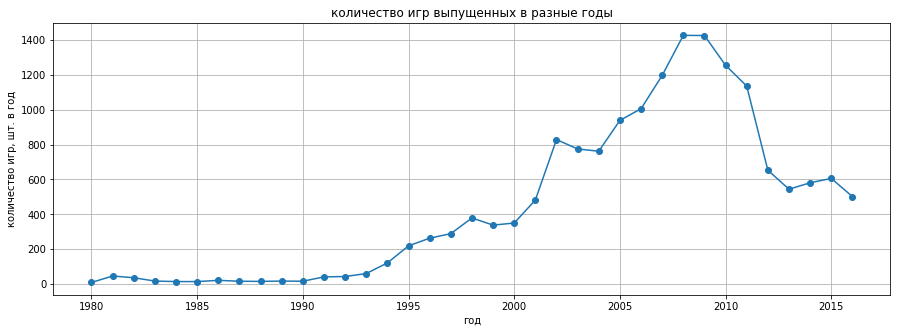

In [36]:
# Определим количество игр выпущенных в разные годы
data_count_yars_name = data.groupby(['year_of_release'])['name'].count()
data_count_yars_name.plot(style='o-', figsize=(15,5), grid = True, title = 'количество игр выпущенных в разные годы')
plt.xlabel('год')
plt.ylabel('количество игр, шт. в год')
plt.show()

Из графика видно следующее:
- количество выпускаемых игр росло с 1980 года и достило максимума в 2008 и 2009 годах
- количество выпущенных игр с 1980 по 1990 год не превышало 50 игр в год
- после 2009 года наблюдается спад в количестве выпущенных игр

Найдем среднюю и медианную продолжительность выхода платформ на рынок

In [37]:
platform_year = [] #создадим пустой словарь, в него запишем платформы и количество лет на рынке для каждой платформы
#итерировать будем по уникальным значениям названия платформ
platform = data.query('platform != "pc" and year_of_release >= 1986')['platform'].unique() 
for q in platform:
    w = [] #пройдём циклом по всем данным и внесём в список w годы в которые выходили платформы
    for i in range(len(data['year_of_release'])): 
        if (q == data['platform'][i]) and (data['year_of_release'][i] not in w): #проверим что годы выхода платформ не дублируется  
            w.append(data['year_of_release'][i])
            r = len(w) #длина списка соответствует количеству лет для каждой платформы  
    platform_year.append([q,r]) #создадим список списков
names_column_df = ['платформа', 'лет_на_рынке'] #список с наименованиями столбцов для создания датафрейма
df_platform_year = pd.DataFrame(data=platform_year, columns=names_column_df) #создадим датафрейм
df_platform_year = df_platform_year.sort_values(by='лет_на_рынке', ascending=False).reset_index(drop= True)
#отсортируем данные и сбросим индекс
df_platform_year_median = df_platform_year['лет_на_рынке'].median() #найдем медиану
df_platform_year_mean = df_platform_year['лет_на_рынке'].mean() #найдем среднее
#ТОП 10 платформ по продолжительности выхода на рынок:
print('ТОП 10 платформ по продолжительности выхода на рынок (кроме pc - 26 лет на рынке)')
display(df_platform_year.head(10))
print(f'Медианное значение продолжительности выхода игровых платформ составляет {df_platform_year_median} лет')
print(f'Среднее значение продолжительности выхода игровых платформ составляет {df_platform_year_mean} лет')

ТОП 10 платформ по продолжительности выхода на рынок (кроме pc - 26 лет на рынке)


,платформа,лет_на_рынке
0,gb,13
1,x360,12
2,ps2,12
3,nes,12
4,psp,12
5,wii,11
6,ds,11
7,ps3,11
8,snes,10
9,2600,10


Медианное значение продолжительности выхода игровых платформ составляет 7.0 лет
Среднее значение продолжительности выхода игровых платформ составляет 7.066666666666666 лет


**Получили важный вывод.
Характерный срок за который появляются новые и исчезают старые платформы (время жизни платформы на рынке) составляет 7 лет**

В дальнейшем анализе учтём этот факт для подготовки прогнозов

In [38]:
# check
display(df_platform_year.tail(15))

,платформа,лет_на_рынке
15,n64,7
16,3ds,6
17,psv,6
18,sat,6
19,wiiu,5
20,gen,5
21,ng,4
22,xone,4
23,ps4,4
24,ws,3


#### Найдём платформы с наибольшими суммарными продажами и построим распределение по годам. Рассмотрим, как менялись продажи по платформам. 

In [39]:
#Найдем платформы с максимальными сумарными продажами за все года
platform_max_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
display(platform_max_sales.head(10))

platform
ps2     1233.56
x360     961.24
ps3      931.34
wii      891.18
ds       802.78
ps       727.58
ps4      314.14
gba      312.88
psp      289.53
3ds      257.81
Name: total_sales, dtype: float64

Получили ТОП10 игровых платформ с наибольшими продажами по всем рынкам за все года

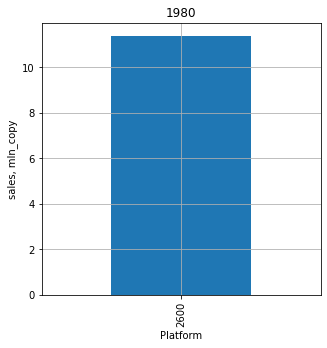

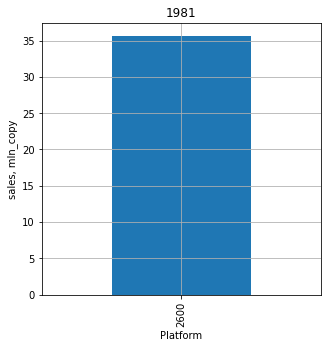

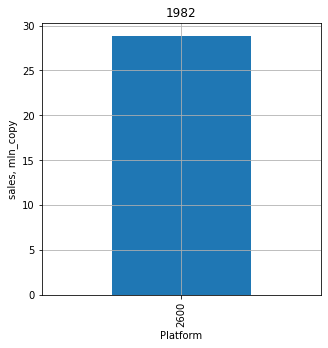

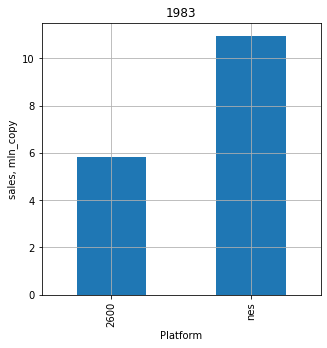

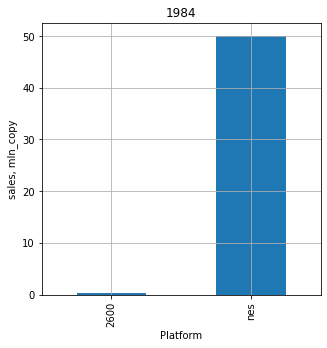

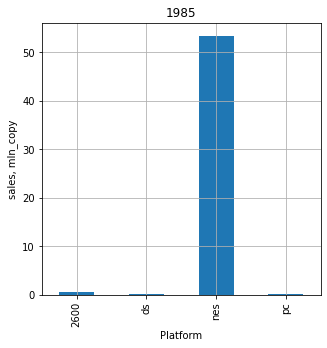

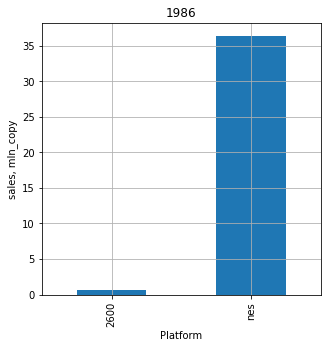

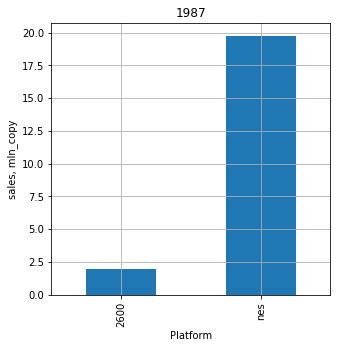

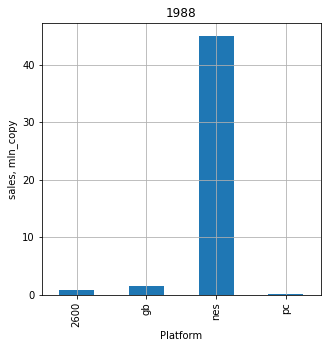

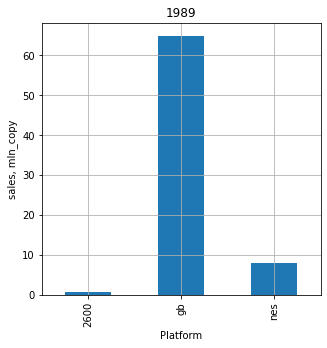

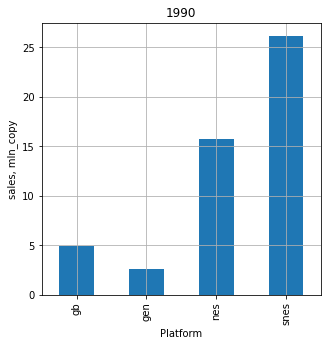

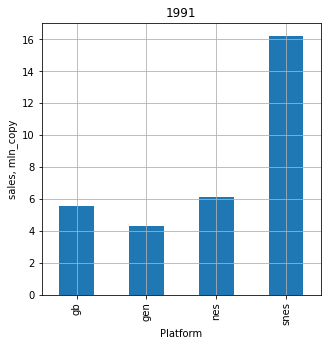

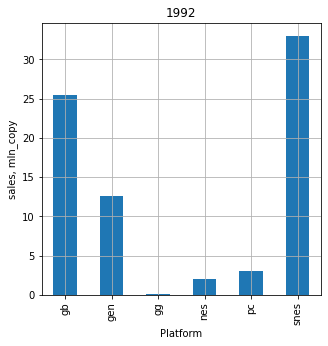

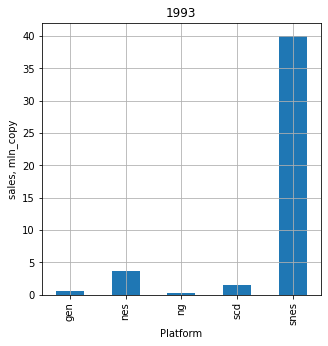

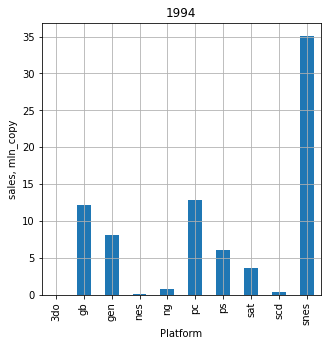

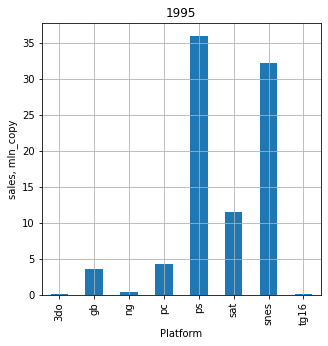

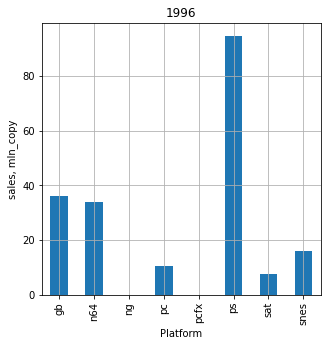

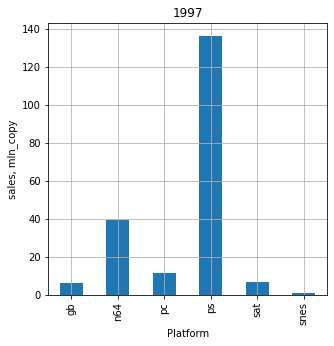

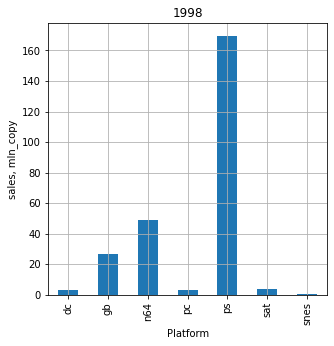

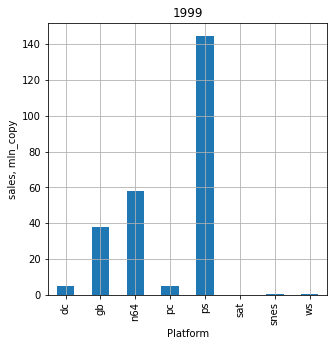

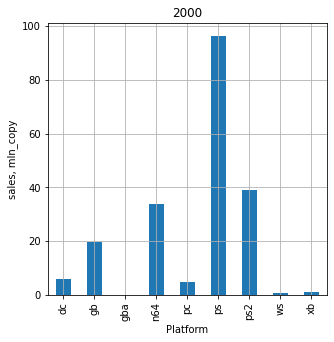

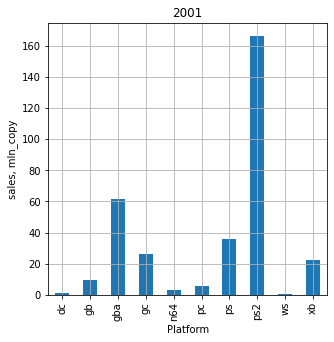

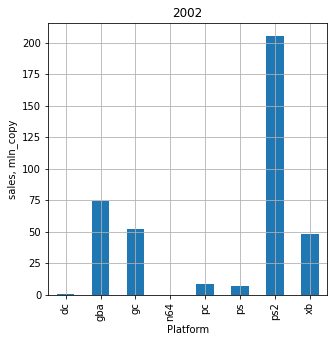

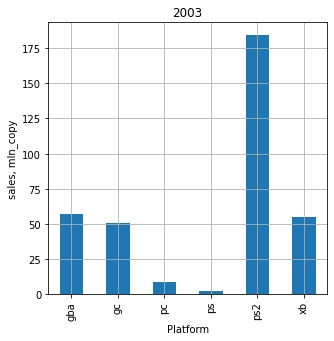

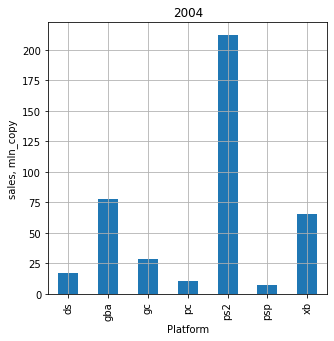

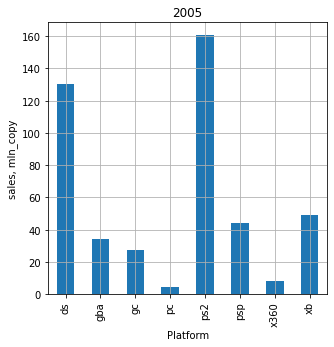

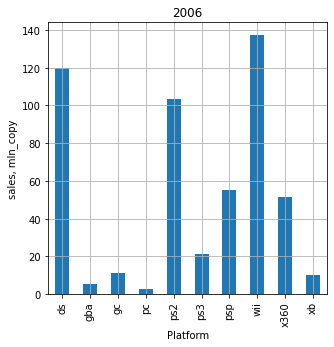

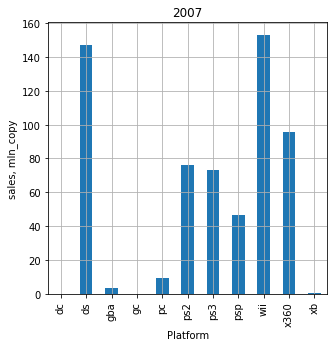

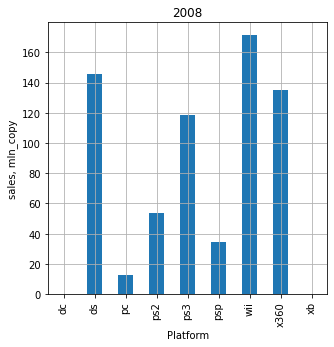

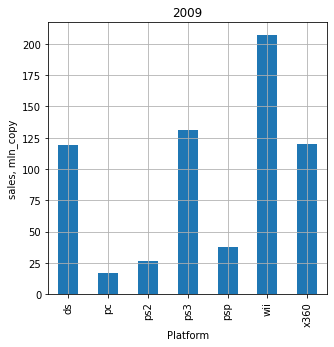

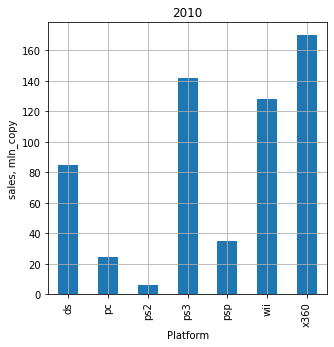

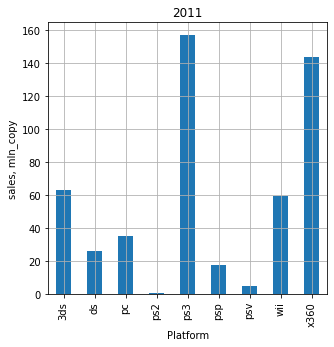

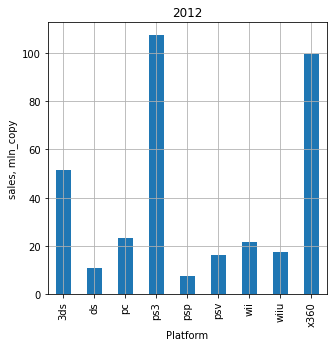

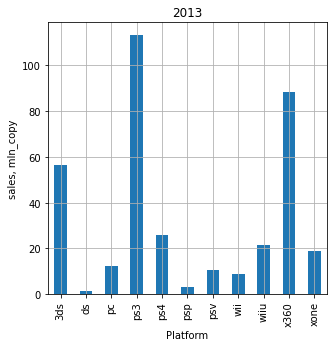

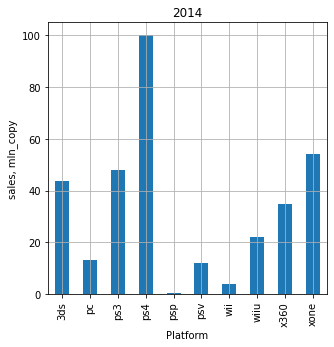

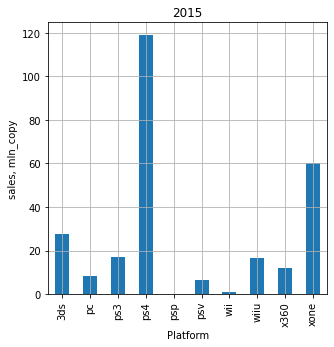

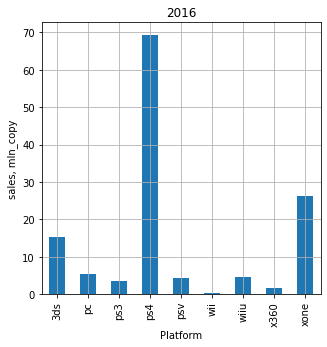

In [40]:
#Построим распределение суммы продаж по платформам по годам
for i in sorted(data['year_of_release'].unique()):
    groupby_year_platform_1 = data.query('year_of_release == @i').groupby('platform')['total_sales'].sum()
    groupby_year_platform_1.plot(kind='bar', figsize=(5,5), xlabel='Platform', ylabel='sales, mln_copy', grid=True)
    plt.title(i)
    plt.show()

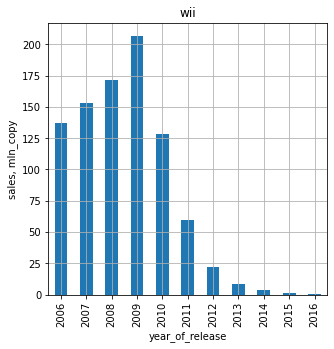

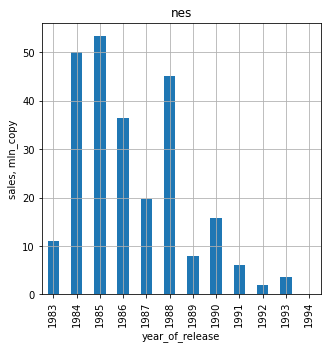

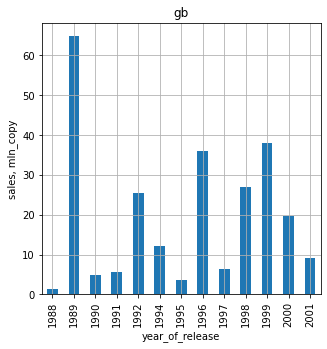

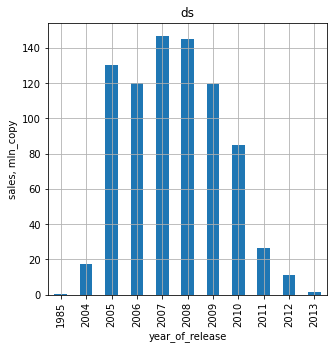

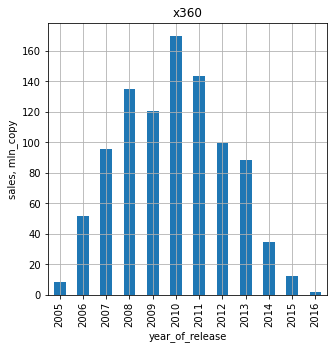

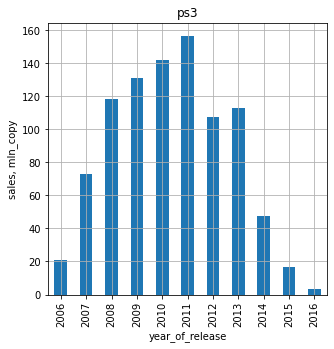

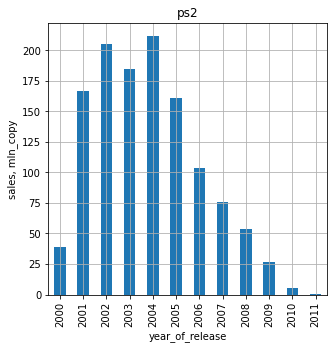

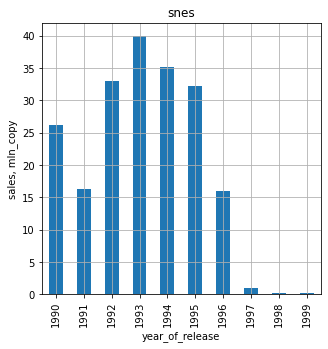

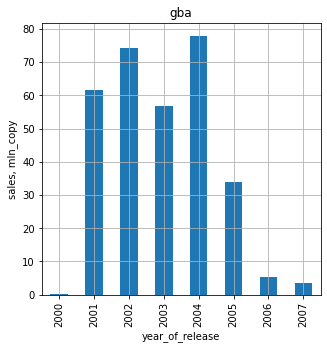

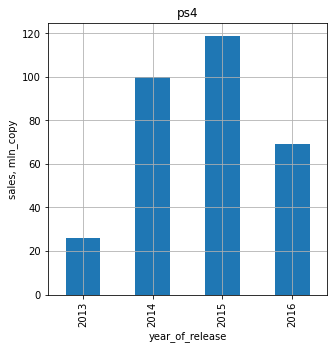

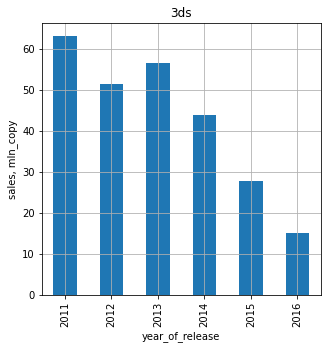

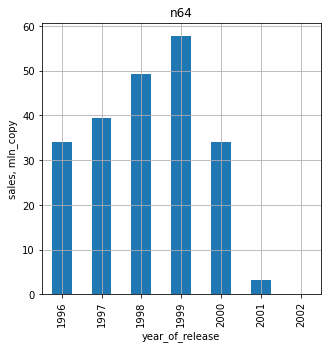

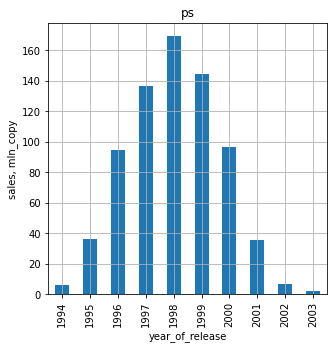

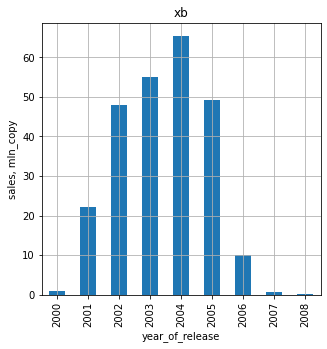

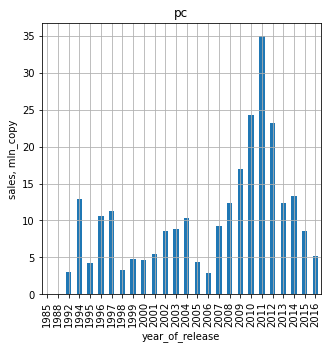

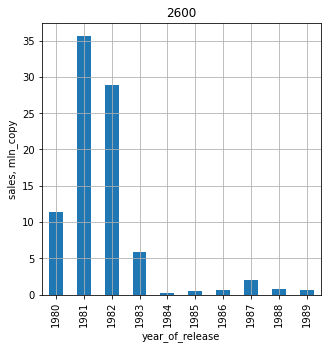

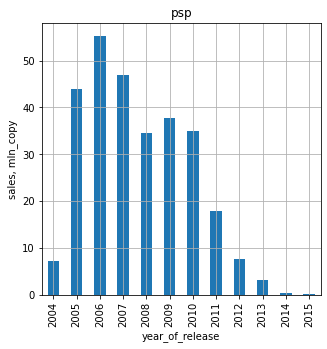

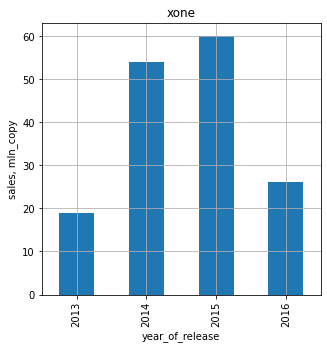

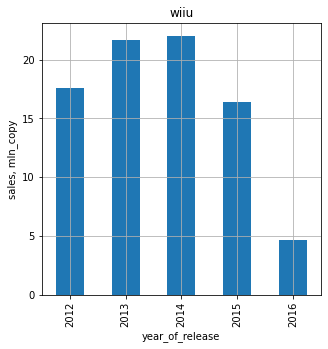

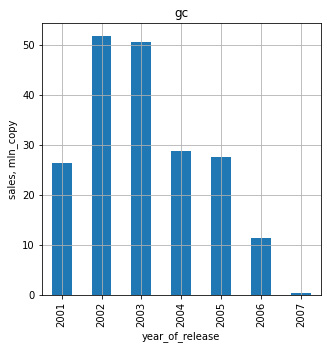

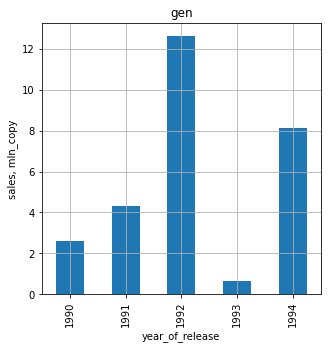

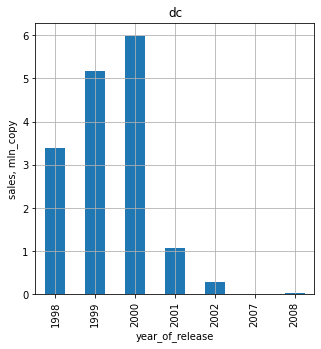

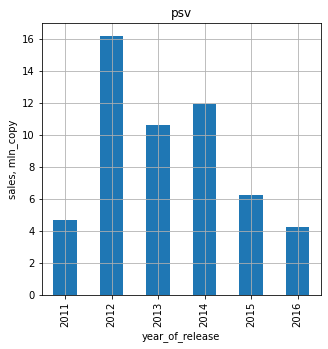

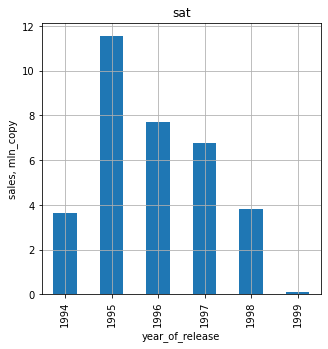

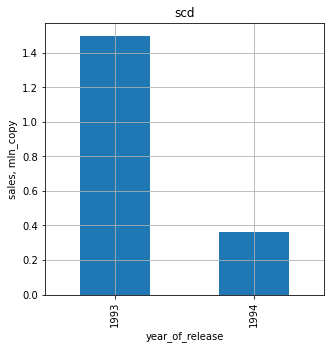

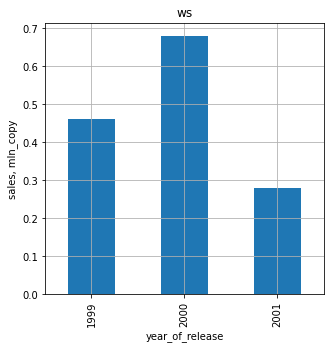

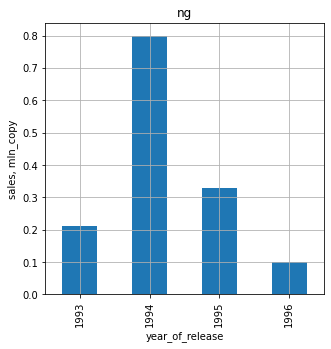

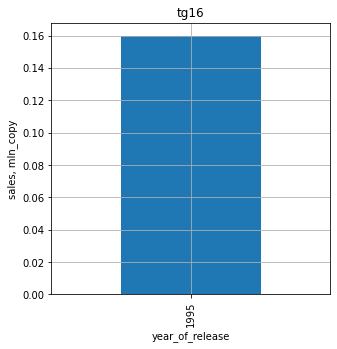

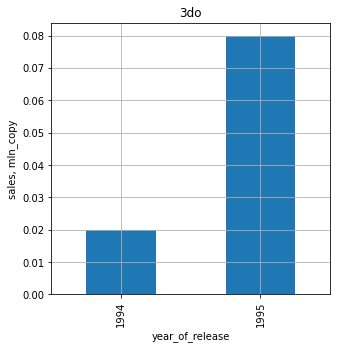

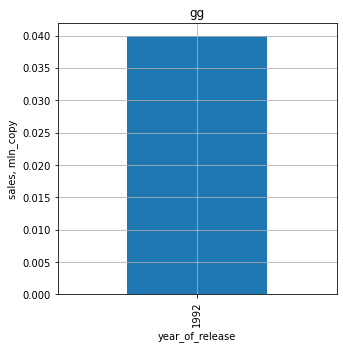

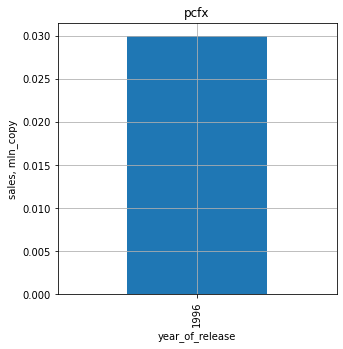

In [41]:
#Построим распределение продаж по годам для каждой платформы
for i in data['platform'].unique():
    groupby_year_platform_2 = data.query('platform == @i').groupby('year_of_release')['total_sales'].sum()
    groupby_year_platform_2.plot(kind='bar', figsize=(5,5), ylabel='sales, mln_copy', grid=True)
    plt.title(i)
    plt.show()

#### Определим актуальный период для построения прогноза на 2017 год.

В разделе 3.1. мы выяснили:
- Медианное значение продолжительности выхода игровых платформ составляет 7.0 лет
- Среднее значение продолжительности выхода игровых платформ составляет 7.06 лет

В связи с тем, что жизнь платформы на рынке (медианное значение) составляет 7 лет, то актуальный период для прогноза на 2017 год будет соответствовать не более половины периода жизни платформы (т.е время её "взлёта").
Соответственно, в целях проноза продаж на 2017 год, актуальный период будет равен 2013 - 2016 год 

Для того, чтобы не учитывать в работе данные за предыдущие (актуальному периоду) годы, отфильтруем данные.

In [42]:
data = data.query('year_of_release >= 2013').reset_index(drop= True)

В процессе подготовки проекта выяснилось, что в данных после среза по актуальному периоду остаются только следующие значения рейтинга "M", "NR", "E", "T", "E10+". Таким образом, можно предположить, что рейтинги "AO"("Adults Only 18+") — "Только для взрослых", "EC" ("Early childhood") — "Для детей младшего возраста" в настоящее время уже не используются

Актуальный период выбран 3 года - половина медианного срока жизни платформы

#### Определим платформы, которые лидируют по продажам (растут или падают).

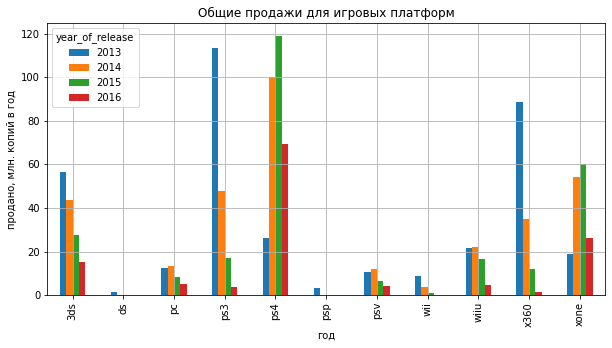

In [43]:
data_pivot = data.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
data_pivot.plot(kind='bar', figsize=(10,5), xlabel='год', ylabel='продано, млн. копий в год', grid=True)
plt.title('Общие продажи для игровых платформ')
plt.show()

Для более внимательного визуального анализа тенденций продаж по платформам построим гистограммы продаж в разбивке по каждой платформе

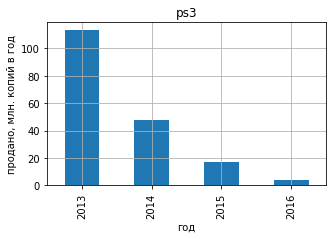

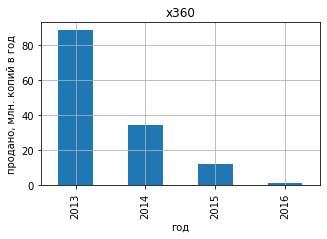

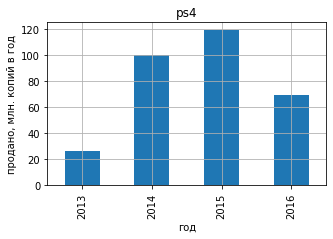

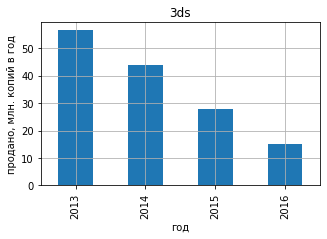

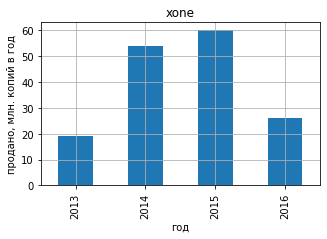

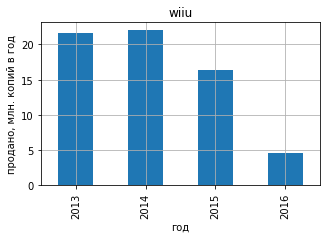

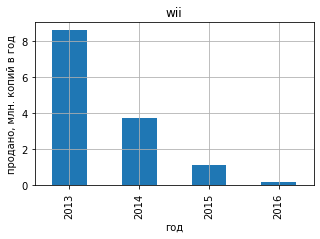

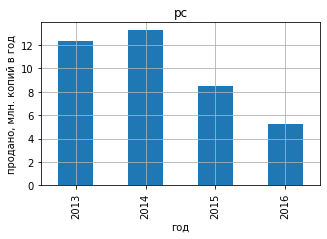

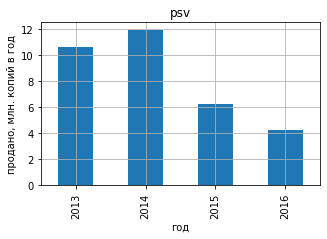

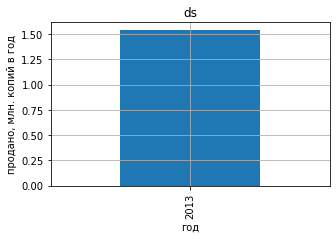

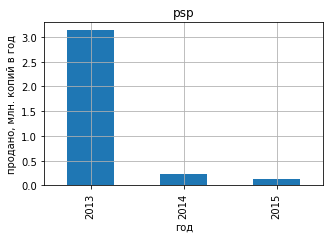

In [44]:
#Построим распределение продаж по годам для каждой платформы
for i in data['platform'].unique():
    groupby_year_platform_2 = data.query('platform == @i').groupby('year_of_release')['total_sales'].sum()
    groupby_year_platform_2.plot(kind='bar', figsize=(5,3), xlabel='год', ylabel='продано, млн. копий в год', grid=True)
    plt.title(i)
    plt.show()

В описании проекта указано, что данные за 2016 год могут быть неполными, поэтому рост продаж по платформам следует оценивать за период 2013-2015 годы.

Рост продаж наблюдается у следующих платформ:
- ps4
- xone

Для остальных платформ наблюдается спад по общим продажам.

Рост общих продаж (как и спад общих продаж) не всегда является критерием успешности.

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

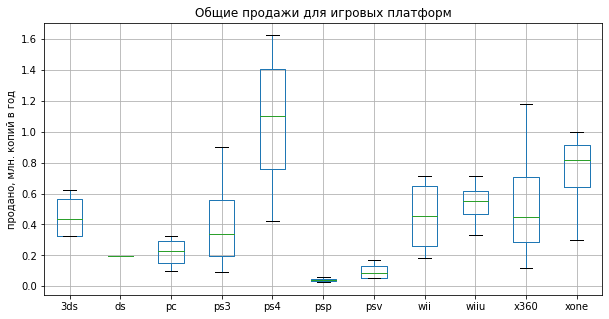

In [45]:
data_pivot = data.pivot_table(index='year_of_release', columns='platform', values='total_sales')
data_pivot.plot(kind='box', figsize=(10,5), xlabel='год', ylabel='продано, млн. копий в год', grid=True)
plt.title('Общие продажи для игровых платформ')
plt.show()

#### Рассмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами

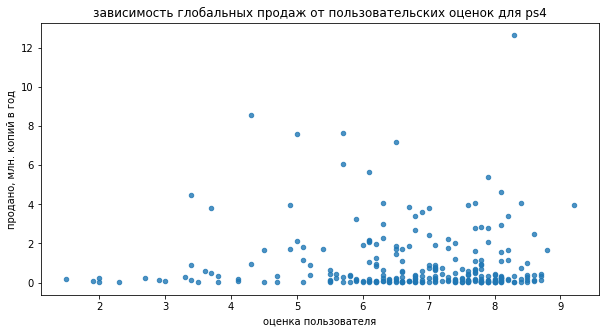

In [46]:
#Построим диаграмму рассеяния для глобальных продаж и пользовательских оценок
data_ps4 = data.query('platform == "ps4"')
data_ps4.plot(y='total_sales', x='user_score', kind='scatter', xlabel='оценка пользователя',\
              ylabel='продано, млн. копий в год', alpha=0.8, figsize=(10,5))
plt.title('зависимость глобальных продаж от пользовательских оценок для ps4')
plt.show()

Определим коэффициент линейной корреляции Пирсона для глобальных продаж и пользовательских оценок

In [47]:
print(data_ps4['total_sales'].corr(data_ps4['user_score']))

-0.031957110204556376


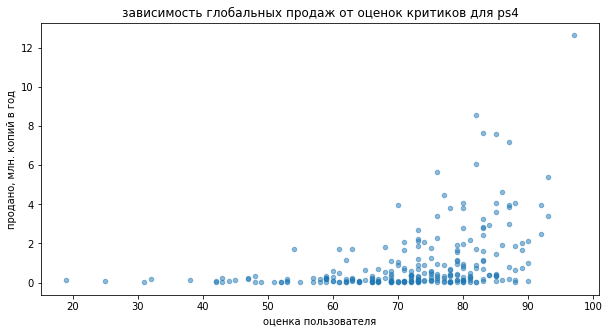

In [48]:
data_ps4.plot(y='total_sales', x='critic_score', kind='scatter', xlabel='оценка пользователя',\
              ylabel='продано, млн. копий в год', alpha=0.5, figsize=(10,5))
plt.title('зависимость глобальных продаж от оценок критиков для ps4')
plt.show()

Определим коэффициент линейной корреляции Пирсона для глобальных продаж и пользовательских оценок

In [49]:
print(data_ps4['total_sales'].corr(data_ps4['critic_score']))

0.406567902061781


Существует средняя положительная корреляция между глобальными продажами и оценками критиков. Это позволяет ввести дополнительный критерий успешности для игровых платформ: **доля игр с оценками критиков выше среднего от всех игр выпущенных на игровой платформе**

Возможно пользователи более критичны к играм, чем критики, но мы не сможем оценить какие действия повлияли на рост продаж в рамках нашего проекта (ограниченность имеющихся данных)
        
       
Приведу пример ложной корреляции, весьма известный в статистической литературе. Была исследована корреляционная связь между числом аистов, свивших гнезда в южных районах Швеции, и рождаемостью в эти же годы в Швеции. Расчёты, выполненные ради шутки, показали существенную положительную корреляцию между этими явлениями, хотя любому понятно, что это ложная корреляция.

Ещё пример ложной корреляции между приемом на работу новых менеджеров и созданием новых производственных мощностей. Возможно, именно менеджеры являются «причиной» капиталовложений в новые производственные мощности? Или же, наоборот, создание новых производственных мощностей послужило «причиной» приема на работу новых менеджеров?

Например, можно обнаружить сильную положительную связь (корреляцию) между разрушениями, вызванными пожаром, и числом пожарных, тушивших пожар. Следует ли заключить, что пожарные вызывают разрушения? Конечно, наиболее вероятное объяснение этой корреляции состоит в том, что размер пожара (внешняя переменная, которую забыли включить в исследование) оказывает влияние, как на масштаб разрушений, так и на числе привлеченных пожарных (т. е. чем больше пожар, тем большее количество пожарных вызывается на его тушение) .

In [50]:
#Найдем среднюю и медианную оценку критиков для всех игр
mean_score = data['critic_score'].mean()
median_score = data['critic_score'].median()
print(f'Средняя оценка пользователей по всем играм составляет {round(mean_score,1)}')
print(f'Медианная оценка пользователей по всем играм составляет {median_score}')

Средняя оценка пользователей по всем играм составляет 72.0
Медианная оценка пользователей по всем играм составляет 74.0


Определим долю успешных игр для каждой платформы. Успешными будем считать игры с рейтингом критиков более 72. Создадим датафрейм, содержащий информацию о доле оценок критиков больше среднего (в процентном соотношении ко всем играм для данной платформы) для игровых платформ в разные годы

In [51]:
score_platform = [] #создадим пустой список
for j in data['platform'].unique(): #пройдём циклом по всем платформам 
    for i in range(2013,2017): #пройдём циклом по годам для платформы
        data_i = data.query('year_of_release == @i') #срез по годам
        data_j = data_i.query('platform == @j') #срез по платформе
        data_j_k = data_j.query('critic_score > 72') #срез по оценкам критиков выше среднего
        if len(data_j['name']) > 0: #исключим возможность деления на ноль
            ratio_platform = len(data_j_k['name'])/len(data_j['name'])*100 #доля успешных игр для платформы в год
            ratio_platform = round(ratio_platform, 2) #округлим до двух знаков после запятой
        else:
            ratio_platform = 0 #присвоим долю равную нулю для платформ с количеством успешных игр равным нулю
            
        score_platform.append([j,i,ratio_platform]) #добавим в список score_platform список с названием платформы, годом и доли успешных игр
names_column_ratio_platform = ['platform', 'year', 'ratio_critic_score'] #список с наименованиями столбцов для создания датафрейма
df_ratio_platform_year = pd.DataFrame(data=score_platform, columns=names_column_ratio_platform) #создадим датафрейм
display(df_ratio_platform_year.head())

,platform,year,ratio_critic_score
0,ps3,2013,39.68
1,ps3,2014,12.04
2,ps3,2015,0.00
3,ps3,2016,0.00
4,x360,2013,46.67


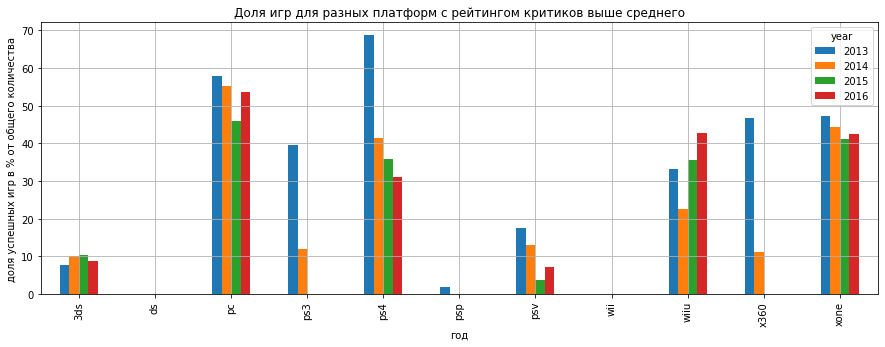

In [52]:
data_pivot_ratio = df_ratio_platform_year.pivot_table(index='platform', columns='year',\
                                                      values='ratio_critic_score', aggfunc='sum')
data_pivot_ratio.plot(kind='bar', figsize=(15,5), xlabel='год', ylabel='доля успешных игр в % от общего количества', grid=True)
plt.title('Доля игр для разных платформ с рейтингом критиков выше среднего')
plt.show()

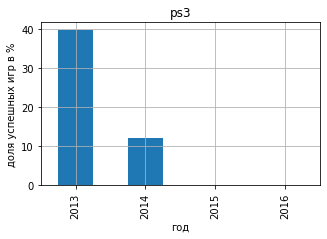

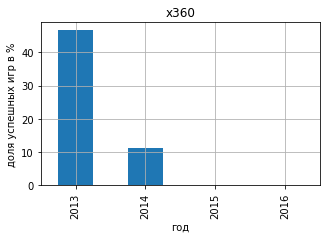

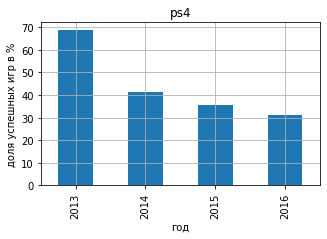

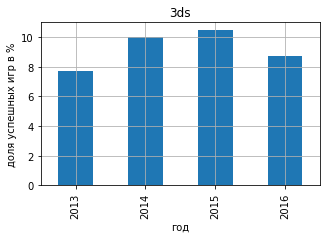

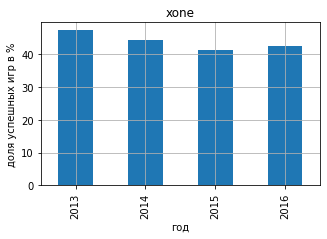

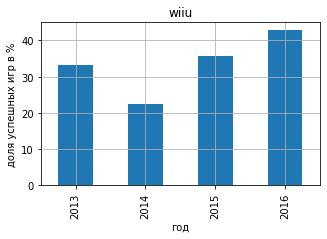

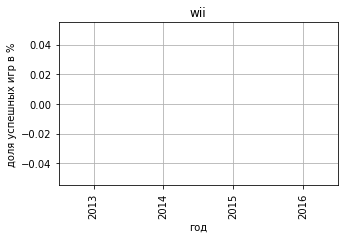

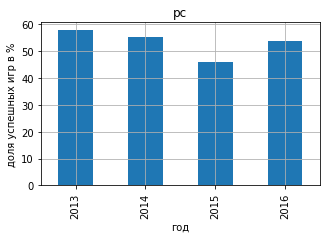

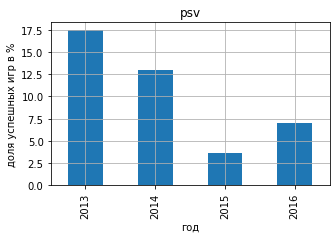

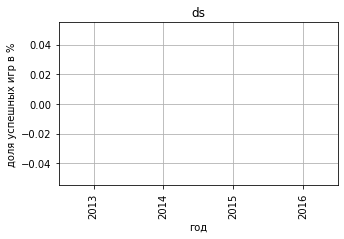

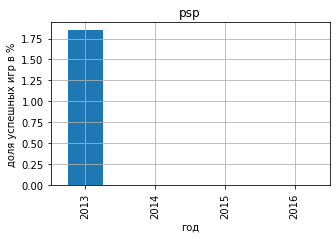

In [53]:
#Построим гистограммы в разбивке по каждой платформе с отображением доли успешных игр
for i in df_ratio_platform_year['platform'].unique():
    groupby_year_platform_3 = df_ratio_platform_year.query('platform == @i').groupby('year')['ratio_critic_score'].sum()
    groupby_year_platform_3.plot(kind='bar', figsize=(5,3), xlabel='год', ylabel='доля успешных игр в %', grid=True)
    plt.title(i)
    plt.show()

#### Соотнесём выводы с продажами игр на других платформах

В пункте 3.4 было показано, что рост продаж наблюдается для игровых платформ:
- ps4
- xone

Рост успешности игр (доля игр с оценками критиков выше среднего) наблюдается у следующих платформ:
- wiiu (рост с 33% в 2013 до 36% в в 2015 году)
- 3ds (рост доли успешных игр с 6.5% в 2014 до 11% в 2015 году)
  Стабильно высокая доля успешных игр наблюдается для следующих платформ:
- ps (с небольшим падением доли успешных игр с 58% в 2013 до 54% в 2016 году)
- xone (с небольшим падением доли успешных игр с 48% в 2013 до 41% в 2015 году) 

Платформа ps4 показывает падение доли успешных игр с 70% в 2013 до 35% в 2015 году, но продолжает быть лидером по количеству глобальных продаж

Исходя из динамики общих продаж и успешности выпускаемых игр наиболее перспективными являются следующие платформы:
1) ps4

2) xone

3) ps

4) wiiu

5) 3ds

#### Посмотрим на общее распределение игр по жанрам

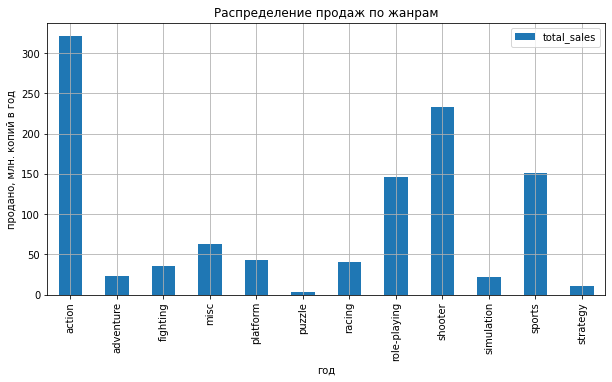

In [54]:
data_pivot_genre_all = data.pivot_table(index='genre', values='total_sales', aggfunc='sum')
data_pivot_genre_all.plot(kind='bar', figsize=(10,5), xlabel='год', ylabel='продано, млн. копий в год', grid=True)
plt.title('Распределение продаж по жанрам')
plt.show()

Наибольшей популярностью пользуются жанры (в порядке убывания популярности): action, shooter, role-playing, sports, role-playing

Посмотрим распределение продаж по жанрам в разбивке по игровым платформам:

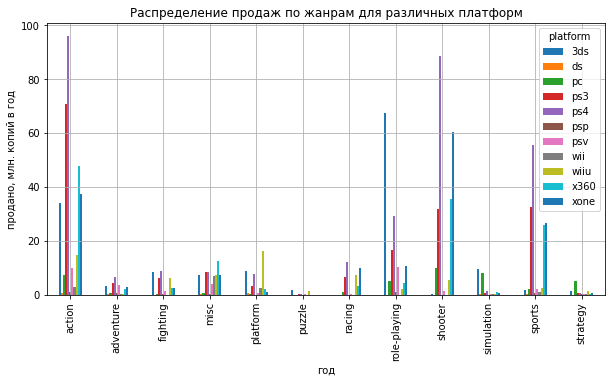

In [55]:
data_pivot_genre = data.pivot_table(index='genre', columns='platform', values='total_sales', aggfunc='sum')
data_pivot_genre.plot(kind='bar', figsize=(10,5), xlabel='год', ylabel='продано, млн. копий в год', grid=True)
plt.title('Распределение продаж по жанрам для различных платформ')
plt.show()

При сохранении общего тренда популярности жанров: action, shooter, role-playing, sports, role-playing видно, что для некоторых платформ (например, для xone) количество продаж игр в жанре role-playing, shooter и action превышает количество продаж игр в жанре action

In [56]:
#Выведем сводную таблицу по году, жанрам и медианным продажам 
data_genre_sales = data.pivot_table(index='year_of_release', columns='genre', values='total_sales', aggfunc='median')
display(data_genre_sales)

genre,action,adventure,fighting,misc,platform,puzzle,racing,role-playing,shooter,simulation,sports,strategy
year_of_release,,,,,,,,,,,,
2013,0.200,0.025,0.155,0.175,0.385,0.100,0.34,0.180,0.340,0.105,0.37,0.190
2014,0.205,0.040,0.130,0.160,0.830,0.050,0.17,0.110,0.660,0.120,0.46,0.060
2015,0.070,0.030,0.100,0.190,0.100,0.045,0.15,0.105,0.925,0.200,0.12,0.045
2016,0.050,0.020,0.085,0.040,0.100,0.010,0.05,0.120,0.240,0.025,0.12,0.060


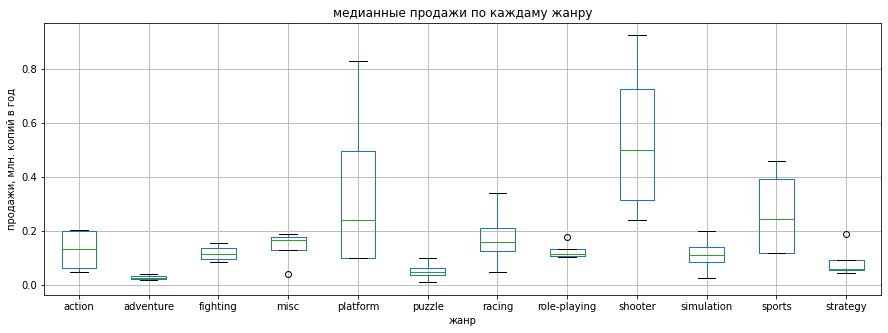

In [57]:
# Построим диаграмму размаха для анализа прибыльности жанров
data_genre_sales.plot(kind='box', figsize=(15,5), grid=True)
plt.xlabel('жанр')
plt.ylabel('продажи, млн. копий в год')
plt.title('медианные продажи по каждаму жанру')
plt.show()

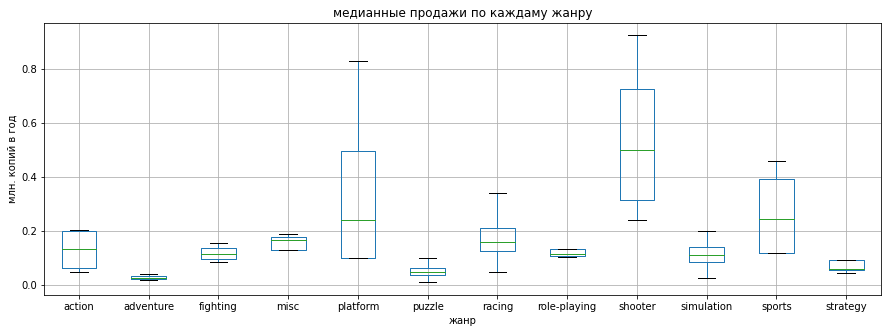

In [58]:
#Построим диаграмму размаха без выбросов
data_genre_sales.plot(kind='box', figsize=(15,5), grid=True, showfliers=False)
plt.xlabel('жанр')
plt.ylabel('млн. копий в год')
plt.title('медианные продажи по каждаму жанру')
plt.show()

Из диаграмм размаха видно, что медианные продажи выше всего у жанров shooter, platform и sports

#### Вывод по разделу 3

Исходя из динамики общих продаж и успешности выпускаемых игр наиболее перспективными являются следующие платформы: ps4, xone, ps, wiiu, 3ds

Существует положительная корреляция между глобальными продажами и оценками критиков

Наибольшей популярностью пользуются жанры (в порядке убывания популярности): action, shooter, role-playing, sports, role-playing

### Определим портрет пользователя каждого региона

#### Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5)

Создадим функцию, строющую сводную таблицу по продажам платформ в разных регионах (США, Европа, Япония). Функция будет выдавать ТОП-5 платформ по продажам. Продажи по остальным платформам суммируются и входят в обобщенную категорию 'others'

In [59]:
def platform_region(a):
    #Построим сводную таблицу по платформам
    data_pivot_platform_region = data.pivot_table(index='platform', values=a, aggfunc='sum')\
    .sort_values(by=a, ascending=False).reset_index()
    #Соберем все платформы после ТОП-5 в платформу others и удалим другие платформы
    c=0
    for i in range(data_pivot_platform_region.shape[0]):
        if i>4:
            c += data_pivot_platform_region[a][i]
            data_pivot_platform_region.drop(i, axis=0, inplace=True)
    new_row = {'platform':'others', a:c}
    data_pivot_platform_region = data_pivot_platform_region.append(new_row, ignore_index=True)\
    .sort_values(by=a, ascending=False).reset_index(drop=True)
    return data_pivot_platform_region

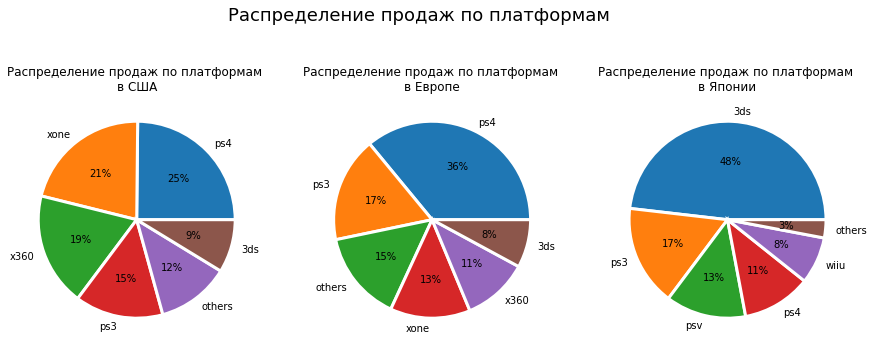

In [60]:
plt.figure(figsize=(15,15))
plt.subplot(1, 3, 1)
plt.pie(platform_region('na_sales')['na_sales'], labels=platform_region('na_sales')['platform'], autopct='%.f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})
plt.title('Распределение продаж по платформам \nв США')
plt.subplot(1, 3, 2)
plt.pie(platform_region('eu_sales')['eu_sales'], labels=platform_region('eu_sales')['platform'], autopct='%.f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})
plt.title('Распределение продаж по платформам \nв Европе')
plt.subplot(1, 3, 3)
plt.pie(platform_region('jp_sales')['jp_sales'], labels=platform_region('jp_sales')['platform'], autopct='%.f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})
plt.title('Распределение продаж по платформам \nв Японии')
plt.suptitle("Распределение продаж по платформам",fontsize=18, y=0.7)
plt.show()

Лидерами рынка игровых платформ в Северной Америке являются: ps4, xone, x360, ps3, 3ds. На долю других платформ приходится 12%
Лидерами рынка игровых платформ в Европе являются: ps4, ps3, xone, x360, 3ds. Но на долю других платформ приходится 15%

ТОП 5 японского рынка игровых платформ отличается от американского и европейского. В ТОП 5 японского рынка входят только японские производители игровых платформ: 3ds (производитель Nintendo - Япония), ps3 (производитель Sony - Япония), psv (производитель Sony - Япония), ps4 (производитель Sony - Япония), wiiu (производитель Nintendo - Япония). На долю остальных платформ приходится всего 3%

#### Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5). 

Аналогично пункту 4.1 создадим функцию, строющую сводную таблицу по продажам игр разных жанров в разных регионах (США, Европа, Япония). Функция будет выдавать ТОП-5 платформ по продажам. Продажи по остальным платформам суммируются и входят в обобщенную категорию 'others'

In [61]:
def genre_region(a):
    #Построим сводную таблицу по жанрам
    data_pivot_region_genre = data.pivot_table(index='genre', values=a, aggfunc='sum')\
    .sort_values(by=a, ascending=False).reset_index()
    #Соберем все платформы после ТОП-5 в платформу others и удалим другие платформы
    c=0
    for i in range(data_pivot_region_genre.shape[0]):
        if i>4:
            c += data_pivot_region_genre[a][i]
            data_pivot_region_genre.drop(i, axis=0, inplace=True)
    new_row = {'genre':'others', a:c}
    data_pivot_region_genre = data_pivot_region_genre.append(new_row, ignore_index=True)\
    .sort_values(by=a, ascending=False).reset_index(drop=True)
    return data_pivot_region_genre

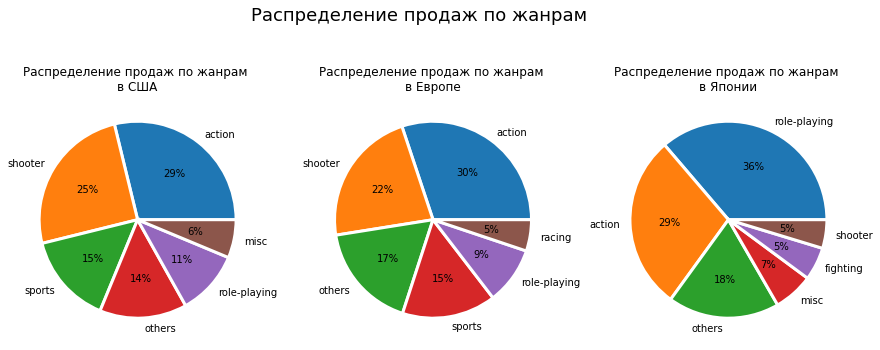

In [62]:
plt.figure(figsize=(15,15))
plt.subplot(1, 3, 1)
plt.pie(genre_region('na_sales')['na_sales'], labels=genre_region('na_sales')['genre'], autopct='%.f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})
plt.title('Распределение продаж по жанрам \nв США')
plt.subplot(1, 3, 2)
plt.pie(genre_region('eu_sales')['eu_sales'], labels=genre_region('eu_sales')['genre'], autopct='%.f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})
plt.title('Распределение продаж по жанрам \nв Европе')
plt.subplot(1, 3, 3)
plt.pie(genre_region('jp_sales')['jp_sales'], labels=genre_region('jp_sales')['genre'], autopct='%.f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})
plt.title('Распределение продаж по жанрам \nв Японии')
plt.suptitle("Распределение продаж по жанрам",fontsize=18, y=0.7)
plt.show()

В жанровых предпочтениях также существуют отличия между американским, европейским и японскими рынками

Четыре лидирующих жанра на рынке Америки и Европы: action, shooter, sports, role-playing. Пятую позицию на американском рынке занимает жанр misc, а на европейском рынке racing. На долю других жанров в США приходится 14%, а в Европе 17%

Японский ТОП по жанрам выглядит следующим образом: role-playing, action, misc, fighting, shooter. Доля остальных жанров составляет 18%

#### Определим для пользователя каждого региона (NA, EU, JP). Выясним влияние рейтинга ESRB на продажи в отдельном регионе

Аналогично пунктам 4.2 и 4.3 создадим функцию, строющую сводную таблицу по продажам игр с разными рейтингами ESRB в разных регионах (США, Европа, Япония). Функция будет выдавать ТОП-5 платформ по продажам. Продажи по остальным платформам суммируются и входят в обобщенную категорию 'others'

In [63]:
def rating_region(a):
    #Построим сводную таблицу по жанрам
    data_pivot_region_rating = data.pivot_table(index='rating', values=a, aggfunc='sum')\
    .sort_values(by=a, ascending=False).reset_index()
    #Соберем все платформы после ТОП-5 в платформу others и удалим другие платформы
    c=0
    for i in range(data_pivot_region_rating.shape[0]):
        if i>4:
            c += data_pivot_region_rating[a][i]
            data_pivot_region_rating.drop(i, axis=0, inplace=True)
    new_row = {'rating':'others', a:c}
    data_pivot_region_rating = data_pivot_region_rating.append(new_row, ignore_index=True)\
    .sort_values(by=a, ascending=False).reset_index(drop=True)
    return data_pivot_region_rating

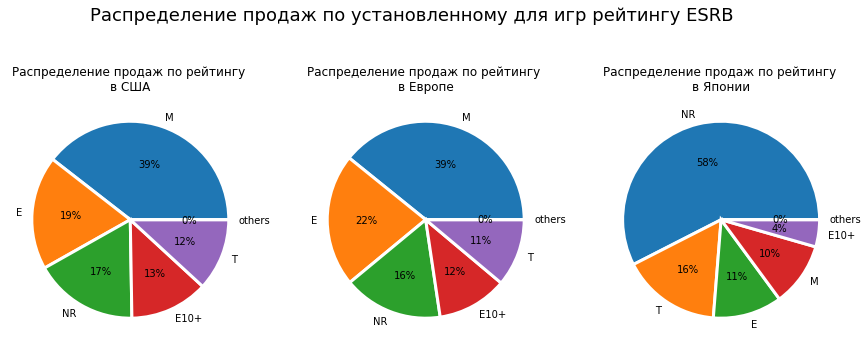

In [64]:
plt.figure(figsize=(15,15))
plt.subplot(1, 3, 1)
plt.pie(rating_region('na_sales')['na_sales'], labels=rating_region('na_sales')['rating'], autopct='%.f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})
plt.title('Распределение продаж по рейтингу \nв США')
plt.subplot(1, 3, 2)
plt.pie(rating_region('eu_sales')['eu_sales'], labels=rating_region('eu_sales')['rating'], autopct='%.f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})
plt.title('Распределение продаж по рейтингу \nв Европе')
plt.subplot(1, 3, 3)
plt.pie(rating_region('jp_sales')['jp_sales'], labels=rating_region('jp_sales')['rating'], autopct='%.f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})
plt.title('Распределение продаж по рейтингу \nв Японии')
plt.suptitle("Распределение продаж по установленному для игр рейтингу ESRB",fontsize=18, y=0.7)
plt.show()

Ранее было установлено, что в данных после среза по актуальному периоду остаются только следующие значения рейтинга "M", "NR", "E", "T", "E10+". Таким образом, можно предположить, что рейтинги "AO"("Adults Only 18+") — "Только для взрослых", "EC" ("Early childhood") — "Для детей младшего возраста" в настоящее время уже не используются.

Американский и Европейский рынок схожи по рейтинговым предпочтениям. Первое место на американском и европейском рынке занимают игры с рейтингом "М" - для взросых, на втором месте игры с рейтингом "Е" - для всех.

На Японском рынке большая часть продаж приходится на игры с неопределенным рейтингом (58% продаж). Японские пользователи также предпочитают игры с рейтингом "Т" - для подростков (16%), на третьем месте игры с рейтингом "Е" - для всех (11%). Игры с рейтингами "М" - для взросых и "Е10+" - для всех с 10 лет имеют 10% и 4% продаж соответственно.

Также было установлено, что в данных после среза по актуальному периоду остаются только следующие значения рейтинга "M", "NR", "E", "T", "E10+". Таким образом, можно предположить, что рейтинги "AO"(Adults Only 18+) — Только для взрослых, "EC" (Early childhood) — Для детей младшего возраста в настоящее время уже не используются.

### Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем гипотезы:

H_0: Средний пользовательские рейтинг платформы xone = Среднему пользовательскому рейтингу платформы pc

H_1: Средний пользовательские рейтинг платформы xone ≠ Среднему пользовательскому рейтингу платформы pc

Уровень значимости alpha = 0.05

In [65]:
#создадим массивы для проверки гипотезы и очистим их от NaN
data_xone_user_score = data[data['platform'] =='xone']['user_score'].dropna() 
data_ps_user_score = data[data['platform'] =='pc']['user_score'].dropna()

In [66]:
 #вызов метода для проверки гипотезы
results = st.ttest_ind(data_xone_user_score,data_ps_user_score, equal_var=False)
alpha = 0.05 #уровень значимости
if results.pvalue < alpha:
    print(results.pvalue)
    print('Отвергаем нулевую гипотезу')
else:
    print(results.pvalue)
    print('Не получилось отвергнуть нулевую гипотезу')

0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу, что средний пользовательские рейтинг платформы xone = среднему пользовательскому рейтингу платформы pc

Значение p-value показывает: вероятность случайно получить такое или большее различие равно почти 15%, хотя средний пользовательский рейтинг у платформ xone и pc отличаются это слишком большая вероятность, чтобы делать вывод о значимом различии между ними.

#### Средние пользовательские рейтинги жанров Action и Sports разные

В задании необходимо проверить различия между рейтингами жанров Action и Sports.
Сформулируем гипотезы о равенстве рейтингов жанров Action и Sports (отвергнув нулевую гипотезу мы подтвердим различие жанров Action и Sports):

H_0: Средний пользовательские рейтинг жанра Action = Среднему пользовательскому рейтингу жанра Sports

H_0: Средний пользовательские рейтинг жанра Action ≠ Среднему пользовательскому рейтингу жанра Sports
    
Уровень значимости alpha = 0.05

In [67]:
#создадим массивы для проверки гипотезы и очистим их от NaN
array1_1 = data[data['genre'] =='action']['user_score'].dropna()
array2_1 = data[data['genre'] =='sports']['user_score'].dropna()

In [68]:
#вызов метода для проверки гипотезы
results = st.ttest_ind(array1_1,array2_1, equal_var=False)
alpha = 0.05 #уровень значимости
if results.pvalue < alpha:
    print(results.pvalue)
    print('Отвергаем нулевую гипотезу')
else:
    print(results.pvalue)
    print('Не получилось отвергнуть нулевую гипотезу')

1.4460039700704315e-20
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу. Значение p-value слишком мало, чтобы сделать вывод о взаимосвязи рейтингов для жанров Action и Sports. Пользовательские рейтинги жанров Action и Sports разные 

### Общий вывод

С помощью python и библиотек pandas, stats, matplotlib.pyplot была проведена предобработка данных, получены портреты пользователей для каждого региона, проверены гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC и различии пользовательских рейтингов жанров Action и Sports.

Предобработка данных, включала в себя:

- Изменение типов данных;
- Фильтрацию ошибочных данных в датасете;
- Поиск дубликатов в данных и их устранение;

В результате предобработки данных было сделано следующее:

- столбцы приведены к нижнему регистру;
- удалены пропуски в столбцах 'year_of_release', 'name' и 'genre'. Их количество не превышало двух процентов от общих данных.
- были изменены типы данных в столбцах 'user_score' на float и 'year_of_release' на int
- в столбце 'user_score' данные со значением 'tbd' заменены на 'NaN' без изменения смыслового значения. В столбце 'rating' рейтинг «К-А» заменен на «Е» т.к. рейтинг «К-А» был заменён на «Е» в 1998 году
- датасет был дополнен столбцом 'total_sales', содержащим суммарные данные о продажах во всех регионах

В результате предобработки количество строк в датасете уменьшилось с 16715 до 16444.

В результате исследовательского анализа данных установлено следующее:

- время жизни игровых платформ на рынке составляет около 7 лет
- исходя из динамики общих продаж и успешности выпускаемых игр наиболее перспективными являются следующие платформы: ps4, xone, ps, wiiu, 3ds
- существует положительная корреляция между глобальными продажами и оценками критиков
- наибольшей популярностью пользуются жанры (в порядке убывания популярности): action, shooter, role-playing, sports, role-playing

В результате анализа игр, игровых платформ и рейтонгов игр на американском, европейском и японском рынке установлено следующее:

- Лидерами рынка игровых платформ в Северной Америке являются: ps4, xone, x360, ps3, 3ds. На долю других платформ приходится 12%. Лидерами рынка игровых платформ в Европе являются: ps4, ps3, xone, x360, 3ds. Но на долю других платформ приходится 15%. ТОП 5 японского рынка игровых платформ отличается от американского и европейского. В ТОП 5 японского рынка входят только японские производители игровых платформ: 3ds (производитель Nintendo - Япония), ps3 (производитель Sony - Япония), psv (производитель Sony - Япония), ps4 (производитель Sony - Япония), wiiu (производитель Nintendo - Япония). На долю остальных платформ приходится всего 3%
- В жанровых предпочтениях также существуют отличия между американским, европейским и японскими рынками. Четыре лидирующих жанра на рынке Америки и Европы: action, shooter, sports, role-playing. Пятую позицию на американском рынке занимает жанр misc, а на европейском рынке racing. На долю других жанров в США приходится 14%, а в Европе 17%. Японский ТОП по жанрам выглядит следующим образом: role-playing, action, misc, fighting, shooter. Доля остальных жанров составляет 18%
- Американский и Европейский рынок схожи по рейтинговым предпочтениям. Первое место на американском и европейском рынке занимают игры с рейтингом "М" - для взросых, на втором месте игры с рейтингом "Е" - для всех. На Японском рынке большая часть продаж приходится на игры с неопределенным рейтингом (58% продаж). Японские пользователи также предпочитают игры с рейтингом "Т" - для подростков (16%), на третьем месте игры с рейтингом "Е" - для всех (11%). Игры с рейтингами "М" - для взросых и "Е10+" - для всех с 10 лет имеют 10% и 4% продаж соответственно. Также было установлено, что в данных после среза по актуальному периоду остаются только следующие значения рейтинга "M", "NR", "E", "T", "E10+". Таким образом, можно предположить, что рейтинги "AO"(Adults Only 18+) — Только для взрослых, "EC" (Early childhood) — Для детей младшего возраста в настоящее время уже не используются.

В результате статистического анализа данных установлено следующее
- не получилось отвергнуть нулевую гипотезу, что средний пользовательские рейтинг платформы Xbox One = среднему пользовательскому рейтингу платформы PC
- пользовательские рейтинги жанров Action и Sports разные. Значение p-value слишком мало, чтобы сделать вывод о их взаимосвязи 



### Бонус. Несколько иной подход к решению

In [69]:
data_games = pd.read_csv('/datasets/games.csv')

In [70]:
data_games.columns = map(str.lower, data_games.columns)

In [71]:
data_games = data_games.dropna(subset = ['year_of_release', 'name', 'genre'])

In [72]:
data_games['user_score'] = data_games['user_score'].replace('tbd', np.nan).astype('float')

In [73]:
data_games['rating'] = data_games['rating'].fillna('unknown')

In [74]:
data_games['total_sales'] = data_games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [75]:
# check
# круги + категория другие
def graph (df, year, region, name, axes):
    
    df = df.query('year_of_release >= @year')
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'platform': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['platform', 'sales']
      
    labels_c=sales.platform
    colours = {'Wii':'C0', 'NES':'C1', 'GB':'C2', 'DS':'C3', 'X360':'C4', 
    'PS3':'C5', 'PS2':'C6', 'SNES':'C7', 'GBA':'C8',
               'PS4':'steelblue', '3DS':'orange', 
               'N64':'C11', 'PS':'C12', 'XB':'C13', 'PC':'C14', '2600':'C15', 'PSP':'C16', 
               'XOne':'C17',
               'WiiU':'C18', 'GC':'C19', 'GEN':'C20', 'DC':'C21', 'PSV':'C22', 
               'SAT':'C23', 'SCD':'C24', 'WS':'C25', 'NG':'C26', 
               'TG16':'C27', '3DO':'C28', 'GG':'C29', 'PCFX':'C30', 'Other':'darkred'}
   
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               labels= labels_c,
               colors=[colours[key] for key in labels_c],
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    
    plt.tight_layout()

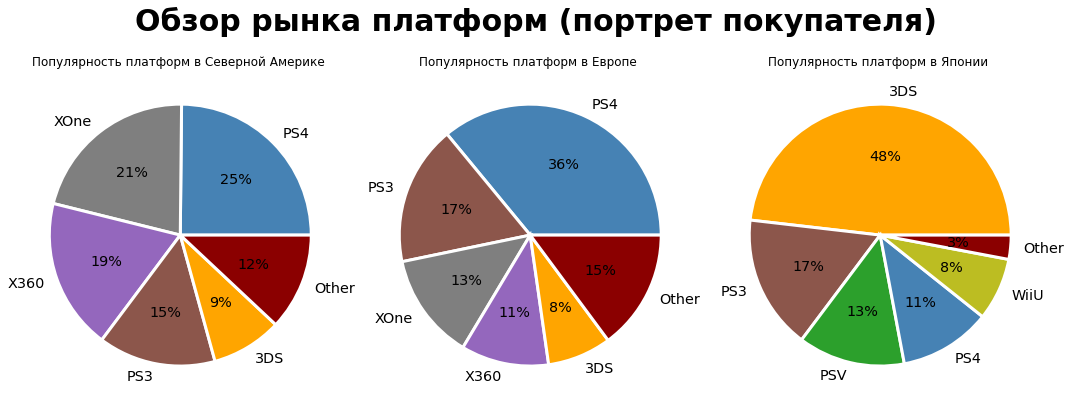

In [76]:
# check
# круги в ряд
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize = 30, fontweight='bold')

x_year = 2013

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

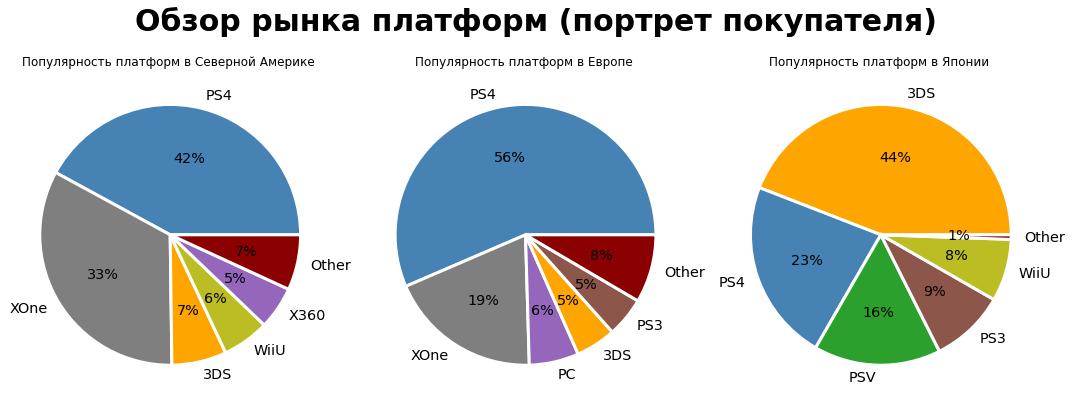

In [77]:
# check
# круги в ряд
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize = 30, fontweight='bold')

x_year = 2015

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])